In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Changing the style to Seaborn style

## Normal Matplotlib style

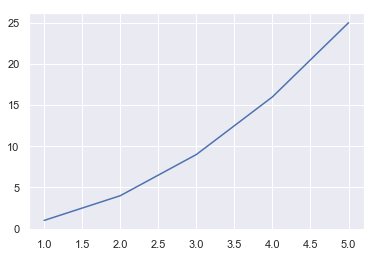

In [19]:
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
plt.plot(x, y)
plt.show()

## Seaborn style

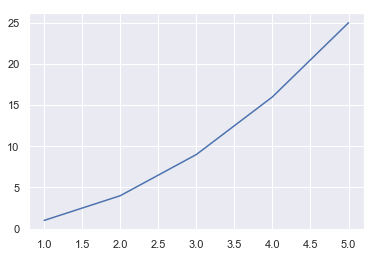

In [20]:
sns.set()

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
plt.plot(x, y)
plt.show()

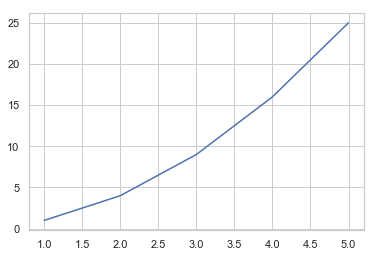

In [21]:
sns.set(style="whitegrid")

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
plt.plot(x, y)
plt.show()

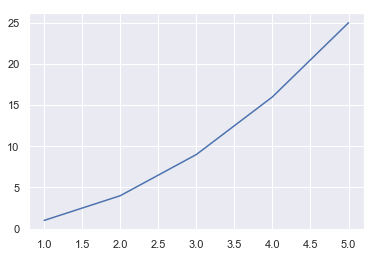

In [22]:
sns.set(style="darkgrid")

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
plt.plot(x, y)
plt.show()

# Plotting a heatmap with your data

In [23]:
def plot_corr_heatmap_input_output(data, output_variables, chunk_size=20, decimals=2, method="pearson"):
    """
    corr_matrix is rounded to 3 decimals; categorical values --> empty grey fields; input variables are sorted
    alphabetically
    """
    corr_matrix = data.corr(method=method).round(decimals=decimals)

    xlabels = output_variables
    ylabels = sorted(list(set(data.columns) - set(output_variables)))

    if len(ylabels) > 20:
        chunks = [ylabels[x:x + chunk_size] for x in range(0, len(ylabels), chunk_size)]

        for y_label_chunk in chunks:
            plt.figure(figsize=(10, 10))

            sns.heatmap(corr_matrix.reindex(index=y_label_chunk, columns=xlabels).dropna(0, how="all").dropna(1, how="all"),
                        vmin=-1.0, vmax=1.0, annot=True, linewidths=.5, cbar=False, cmap="bwr", fmt=".2f")

            plt.ylabel("input variables", fontweight="bold")
            plt.xlabel("output variables", fontweight="bold")
            plt.title("Correlation Matrix (rounded to %s decimals)" % decimals, fontweight="bold", fontsize=14)
            plt.tight_layout()

    else:
        plt.figure(figsize=(10, 10))
        sns.heatmap(corr_matrix.reindex(index=ylabels, columns=xlabels), vmin=-1.0, vmax=1.0, annot=False,
                    linewidths=.5, cbar=True, cmap="bwr")

        plt.ylabel("input variables", fontweight="bold")
        plt.xlabel("output variables", fontweight="bold")
        plt.title("Correlation Matrix (rounded to %s decimals)" % decimals, fontweight="bold", fontsize=16)

        plt.tight_layout()

    plt.show()

In [3]:
df = pd.read_csv("data/preprocessed_data/csv_without_empty_cols_and_merged/all_data.csv",
                     index_col=0,
                     na_values=[-99999, -9999])

C:\Users\mb335485\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
target_variables = ["ErrAbbr", "ModuleTemp_C", "ER_dB", "Ldi_mA", "ModuleTxCalPower_dBm", "TesterTxCalPower_dBm",
                    "TxCrossing_pct", "TxJitter_ps", "TxMaskMargin_pct", "TxMaskRegion1Hits",
                    "TxMaskRegion2Hits", "TxMaskRegion3Hits", "TxMaskTotalHits", "TxOma_mW", "TxPower_dBm"]

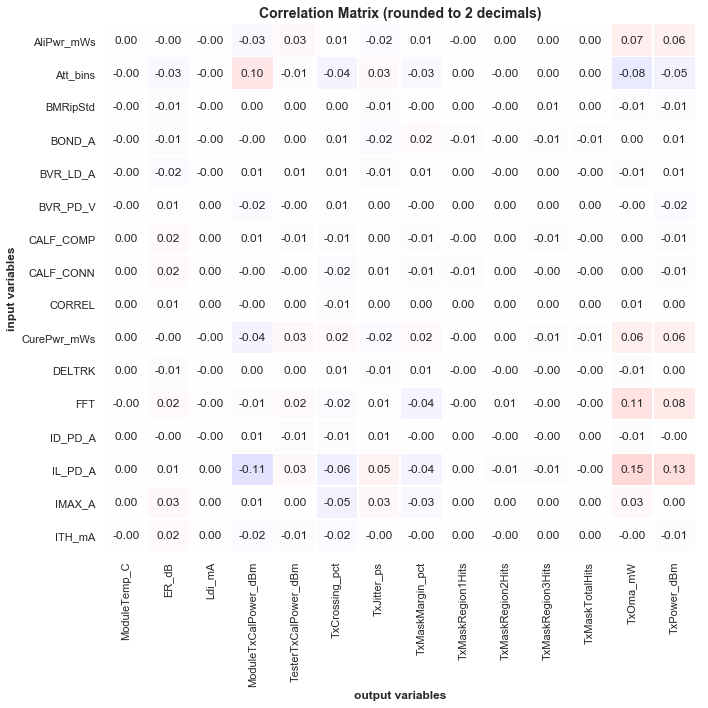

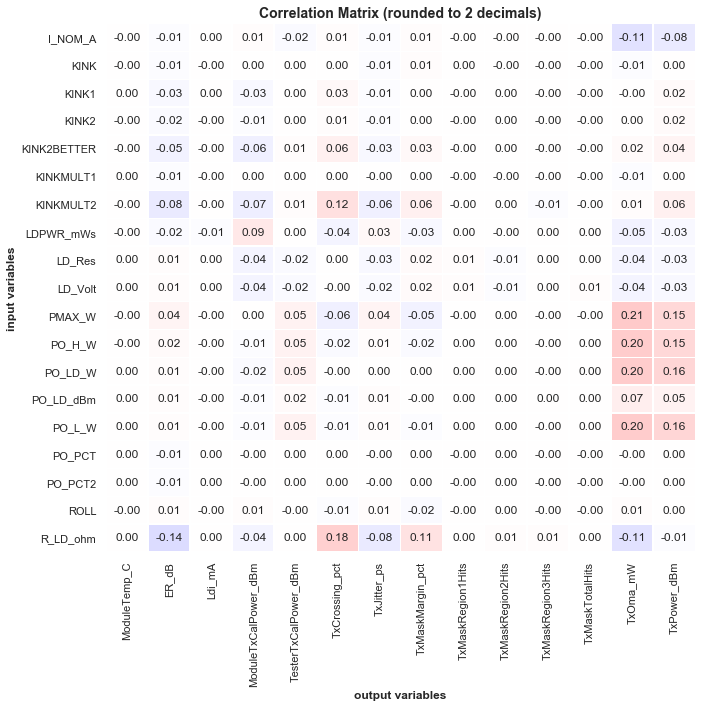

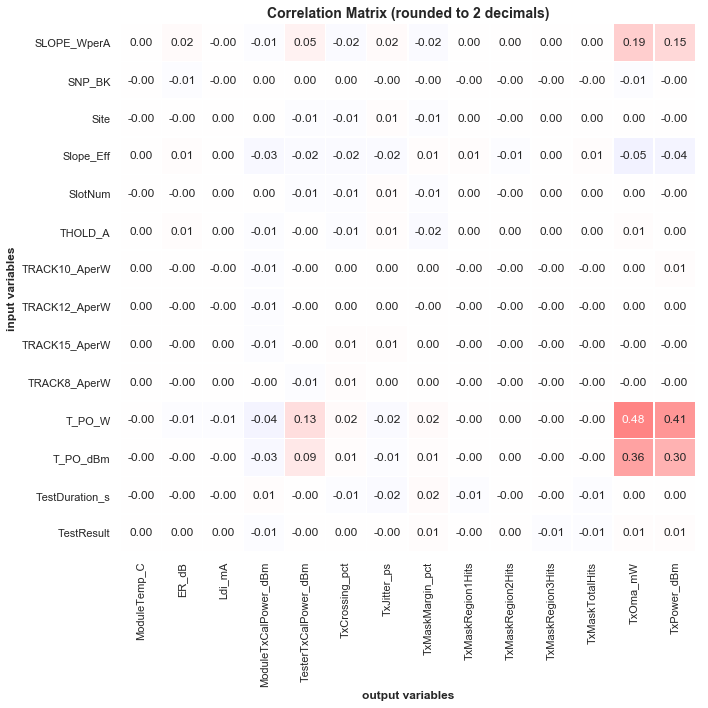

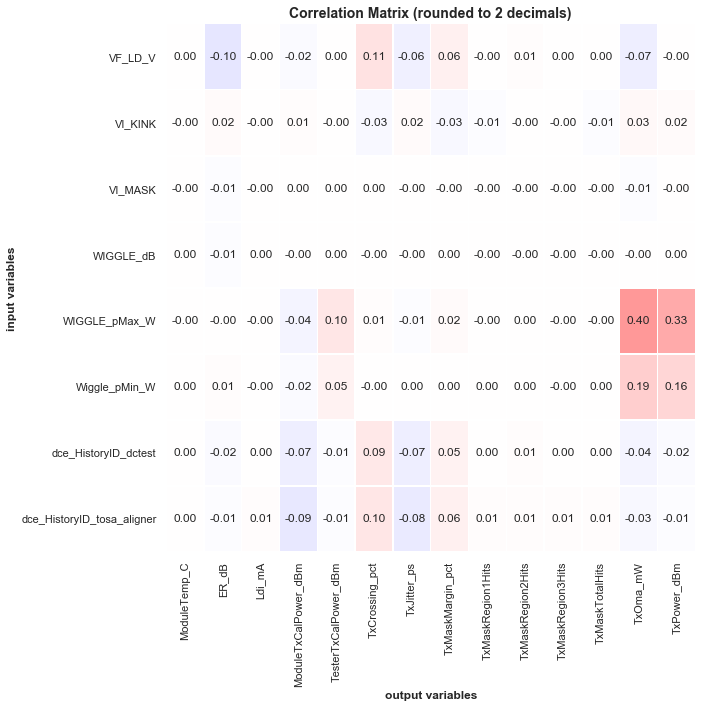

In [26]:
plot_corr_heatmap_input_output(df, target_variables, chunk_size=20, decimals=2, method="pearson")

# Boxplot with your data

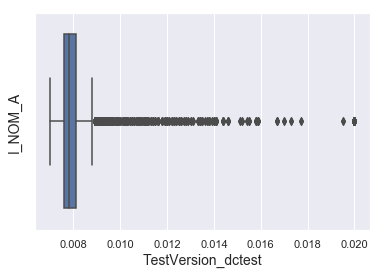

In [27]:
df.drop_duplicates(inplace=True)

plt.figure()
sns.boxplot(data=df, x="I_NOM_A")
plt.ylabel("I_NOM_A", fontsize=14)
plt.xlabel("TestVersion_dctest", fontsize=14)
plt.show()

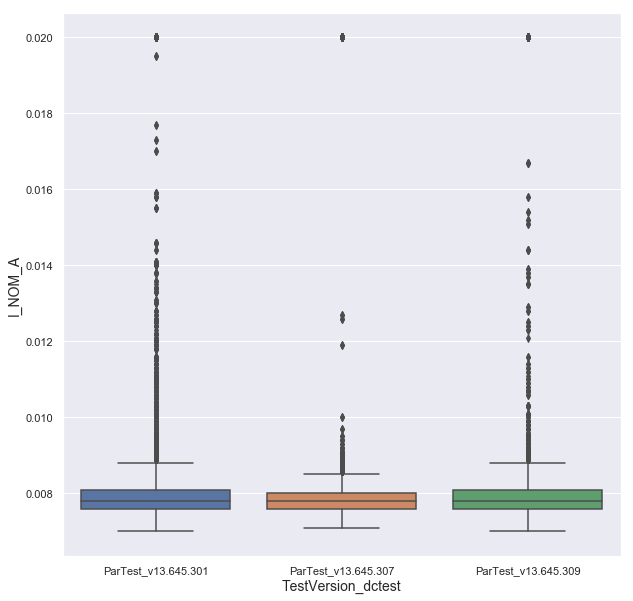

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, y="I_NOM_A", x="TestVersion_dctest")
plt.ylabel("I_NOM_A", fontsize=14)
plt.xlabel("TestVersion_dctest", fontsize=14)
plt.show()

# Violin Plot with your data

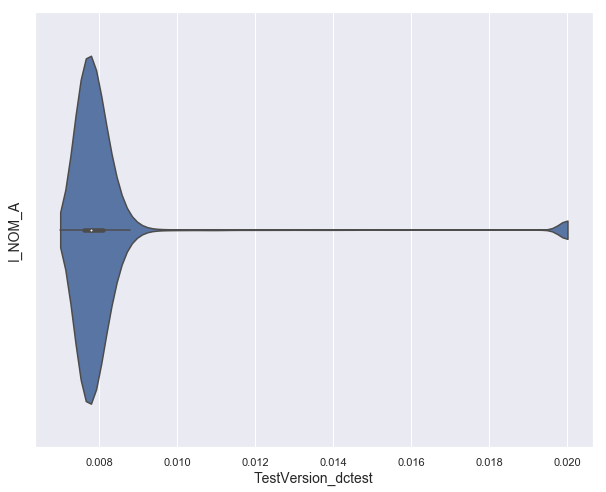

In [29]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df, x="I_NOM_A", cut=0)
plt.ylabel("I_NOM_A", fontsize=14)
plt.xlabel("TestVersion_dctest", fontsize=14)
plt.show()

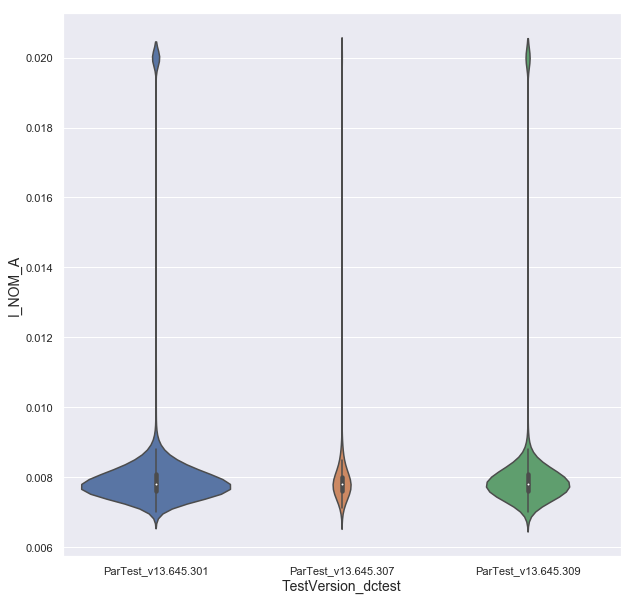

In [30]:
plt.figure(figsize=(10, 10))
sns.violinplot(data=df, y="I_NOM_A", x="TestVersion_dctest", scale="count")
plt.ylabel("I_NOM_A", fontsize=14)
plt.xlabel("TestVersion_dctest", fontsize=14)
plt.show()

# Plot Seaborn Scatter with your data

In [4]:
% matplotlib qt

plt.figure()
df = df[df.groupby("ErrAbbr").ErrAbbr.transform(len) > 100]
sns.scatterplot(data=df[(df["ErrAbbr"] != "PASS")], x="T_PO_W", y="TxOma_mW", hue="ErrAbbr")
plt.show()

# Pairplot

<Figure size 432x288 with 0 Axes>

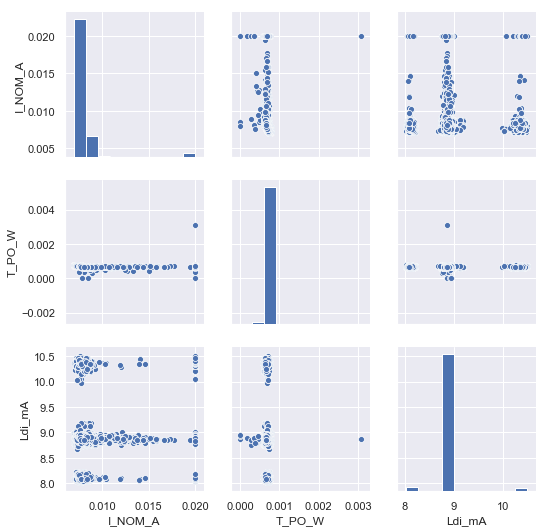

In [32]:
% matplotlib inline

plt.figure()
sns.pairplot(df[["I_NOM_A", "T_PO_W", "Ldi_mA"]].dropna())
plt.show()

In [33]:
plt.close()